In [1]:
import fastf1 as ff1
from fastf1 import utils
from fastf1 import plotting
from fastf1 import legacy

In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
from fastf1.core import Laps

In [3]:
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1', misc_mpl_mods=True)

In [4]:
os.getcwd()
os.chdir('C:/Users/jsmvk/Desktop/projects/Lic')

In [5]:
ff1.Cache.enable_cache('cache')

In [6]:
def telemetry(year, race, session, driver_1, driver_2):
    if session == 'Q':
        ses = 'Qualifying'
    elif session == 'R':
        ses = 'Race'
    elif session == 'S':
        ses = 'Sprint'
    else:
        ses = 'Practice'
    
    session = ff1.get_session(year, race, session)
    session.load()
    
    fast_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
    driver_1_car_data = fast_driver_1.get_car_data()
    
    fast_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()
    driver_2_car_data = fast_driver_2.get_car_data()
    
    delta_time, ref_tel, compare_tel = utils.delta_time(fast_driver_1, fast_driver_2)
    
    speed_1 = driver_1_car_data['Speed']
    time_1 = driver_1_car_data['Time']
    throttle_1 = driver_1_car_data['Throttle']
    
    time_2 = driver_2_car_data['Time']
    throttle_2 = driver_2_car_data['Throttle']
    speed_2 = driver_2_car_data['Speed']
    
    fig, ax = plt.subplots(3)
    fig.set_size_inches(20, 10)
    
    ax[0].plot(time_1, speed_1, label = driver_1, color = ff1.plotting.driver_color(driver_1))
    ax[0].plot(time_2, speed_2, label = driver_2, color = ff1.plotting.driver_color(driver_2))
    ax[0].set_ylabel('Speed [km/h]')
    ax[0].set_title(f'{year} {race} GP {ses}')
    ax[0].legend(loc = 'lower right')
    
    ax[1].plot(time_1, throttle_1, label = driver_1, color = ff1.plotting.driver_color(driver_1))
    ax[1].plot(time_2, throttle_2, label = driver_2, color = ff1.plotting.driver_color(driver_2))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Throttle')
    ax[1].legend(loc = 'lower right')
    
    ax[2].plot(ref_tel['Distance'], delta_time)
    ax[2].axhline(0)
    ax[2].set_ylabel(f'<-- {driver_2} ahead | {driver_1} ahead -->(s)')
    
    plt.show()

In [7]:
def pole_gap(year, race, session):
    if session == 'Q':
        ses = 'Qualifying'
    elif session == 'R':
        ses = 'Race'
    elif session == 'S':
        ses = 'Sprint'
    else:
        ses = 'Practice'
    
    session = ff1.get_session(year, race, session)
    session.load()
    
    drivers = pd.unique(session.laps['Driver'])
    
    list_fastest_laps = list()

    for drv in drivers:
        drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)

    fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    pole_lap = fastest_laps.pick_fastest()
    fastest_laps['LapTimeDelta'] = ((fastest_laps['LapTime'] - pole_lap['LapTime']) / pole_lap['LapTime']) * 100

    team_colors = list()

    for index, lap in fastest_laps.iterlaps():
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)
        
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    
    ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
            color=team_colors, edgecolor='grey')
    ax.set_yticks(fastest_laps.index)
    ax.set_yticklabels(fastest_laps['Driver'])
    ax.invert_yaxis()
    ax.set_title(f'{year} {race} {ses} \n Gap to best lap (%)')

In [8]:
# def session_pace(year, race, session, driver_1, driver_2, driver_3):
#     if session == 'Q':
#         ses = 'Qualifying'
#     elif session == 'R':
#         ses = 'Race'
#     elif session == 'S':
#         ses = 'Sprint'
#     else:
#         ses = 'Practice'
    
#     session = ff1.get_session(year, race, session)
#     session.load()
    
#     fast_driver_1 = session.laps.pick_driver(driver_1).pick_quicklaps()
#     fast_driver_2 = session.laps.pick_driver(driver_2).pick_quicklaps()
#     fast_driver_3 = session.laps.pick_driver(driver_3).pick_quicklaps()
    
#     fig, ax = plt.subplots()
#     fig.set_size_inches(15, 10)
    
#     ax.plot(fast_driver_1['LapNumber'], fast_driver_1['LapTime'], label = driver_1, marker = 'o', 
#             color = ff1.plotting.driver_color(driver_1))
#     ax.plot(fast_driver_2['LapNumber'], fast_driver_2['LapTime'], label = driver_2, marker = 'o', 
#             color = ff1.plotting.driver_color(driver_2))
#     ax.plot(fast_driver_3['LapNumber'], fast_driver_3['LapTime'], label = driver_3, marker = 'o', 
#             color = ff1.plotting.driver_color(driver_3))
#     ax.set_xlabel('Lap Number')
#     ax.set_ylabel('Lap Time')
#     ax.set_title(f'{year} {race} {ses} quickest lap times')
#     ax.legend(loc = 'lower right')
    
    #print(fast_driver_1['LapTime'])

In [9]:
def race_trace(year, race, session, driver_1):
    session = ff1.get_session(year, race, session)
    session.load()
    
    # x = lap
    # y = position
    # hue = driver
    
    driver = session.laps.pick_driver(driver_1)
    pos = driver.get_car_data()
    
    #print(pos['Time'])
    
    #fig, ax = plt.subplots()
    #fig.set_size_inches(5, 10)

In [10]:
race_trace(2022, 'Monza', 'R', 'VER')

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']


core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '63', '4', '3', '10', '14', '31', '77', '45', '24', '22', '6', '5', '18', '20', '47']


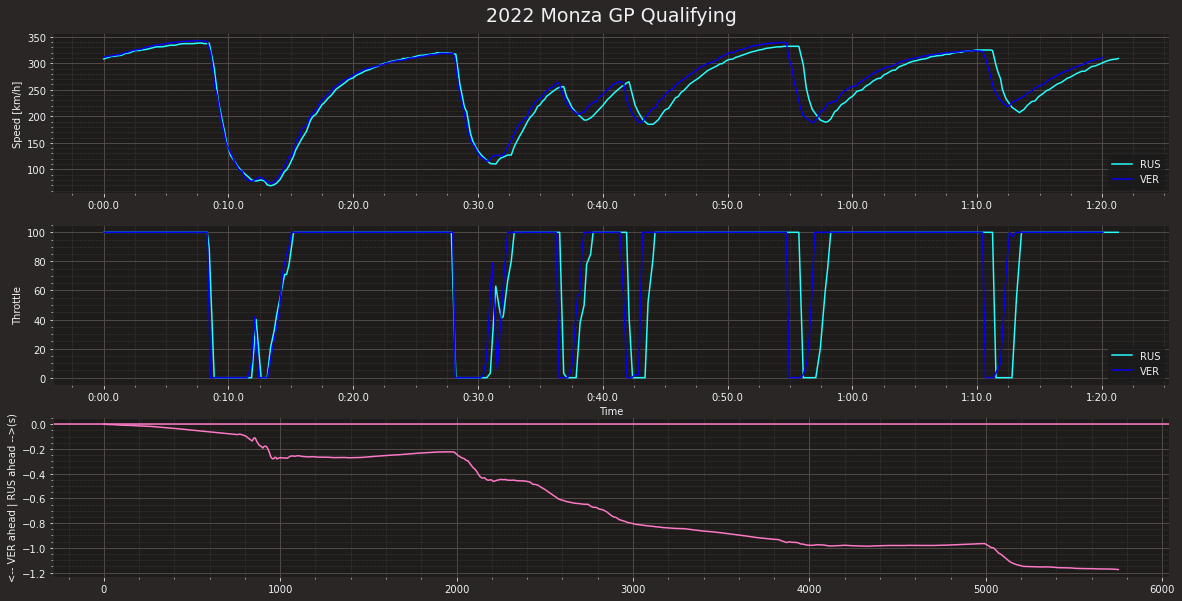

In [11]:
telemetry(2022, 'Monza', 'Q', 'RUS', 'VER')

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


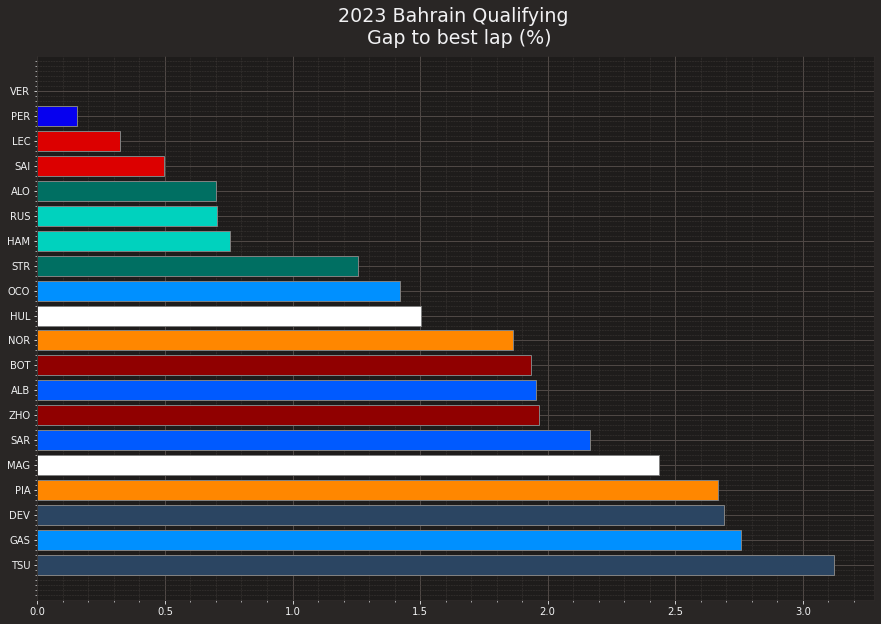

In [12]:
pole_gap(2023, 'Bahrain', 'Q')

In [14]:
#session_pace(2022, 'Abu Dhabi', 'R', 'VER', 'RUS', 'LEC')